In [ ]:
# Building a Word Cloud in Python
# Author: Jose Valdvia Rojas
# HW_9 CMSC 206
# Due 04/03/2022



# 1. How to Build a Search Engine from Scratch in Python
# Create a new Python script and define a simple function to load the database as a Pandas DataFrame
import pandas as pd

def load_data(path):  
  dataframe = pd.read_csv(path)  
  return dataframe


# Normalized Term Frequency
import math

def normalized_term_frequency(word, document):
    raw_frequency = document.count(word)
    if raw_frequency == 0:
        return 0
    return 1 + math.log(raw_frequency)


# Inverse Document Frequency
def docs_contain_word(word, documents):
	counter = 0
	for document in documents:
		if word in document:
			counter+=1
	
	return counter

def get_vocabulary(documents):
	vocabulary = set([word for document in documents for word in document])	
	
	return vocabulary

def inverse_document_frequency(documents, vocabulary):

	idf = {}
	
	for word in vocabulary:
		contains_word = docs_contain_word(word, documents)
		idf[word] = 1 + math.log(len(documents)/(contains_word))
        
	return idf


# All in one
from sklearn.feature_extraction.text import TfidfVectorizer

def tf_idf(search_keys, dataframe, label):
  
	tfidf_vectorizer = TfidfVectorizer()
	tfidf_weights_matrix = tfidf_vectorizer.fit_transform(dataframe.loc[:, label])
	search_query_weights = tfidf_vectorizer.transform([search_keys])
	
	return search_query_weights, tfidf_weights_matrix


# let’s calculate the cosine similarity between a search query vector and all other vectors.
from sklearn.metrics.pairwise import cosine_similarity

def cos_similarity(search_query_weights, tfidf_weights_matrix):
	
	cosine_distance = cosine_similarity(search_query_weights, tfidf_weights_matrix)
	similarity_list = cosine_distance[0]
  
	return similarity_list

# Now, let’s write a function to pick the talks with highest values.
import numpy as np

def most_similar(similarity_list, min_talks=1):
	
	most_similar= []
  
	while min_talks > 0:
		tmp_index = np.argmax(similarity_list)
		most_similar.append(tmp_index)
		similarity_list[tmp_index] = 0
		min_talks -= 1

	return most_similar

"\n◼️ width/height: You can change the word cloud dimension to your preferred width and height with these.\n\n◼️ random_state: If you don’t this set this to a number of your choice, \nyou are likely to get a slightly different word cloud every time you run the same script on the same input data. \nBy setting this parameter, you ensure reproducibility of the exact same word cloud. \nYou could play around with random numbers until you find the one that results in the word cloud you like.\n\n◼️ background_colour: ‘white’ and ‘black’ are common background colours. If you would like to explore more colours, \nthis may come in handy. Please note that some colours may not work. Hope you will find something you fancy.\n\n◼️ colormap: With this argument, you can set up the colour theme that the words are displayed in. \nThere are many beautiful Matplotlib colormaps to choose from. Some of my favourites are ‘rainbow’, ‘seismic’, ‘Pastel1’ and Pastel2’.\n\n◼️ collocations: Set this to False to en

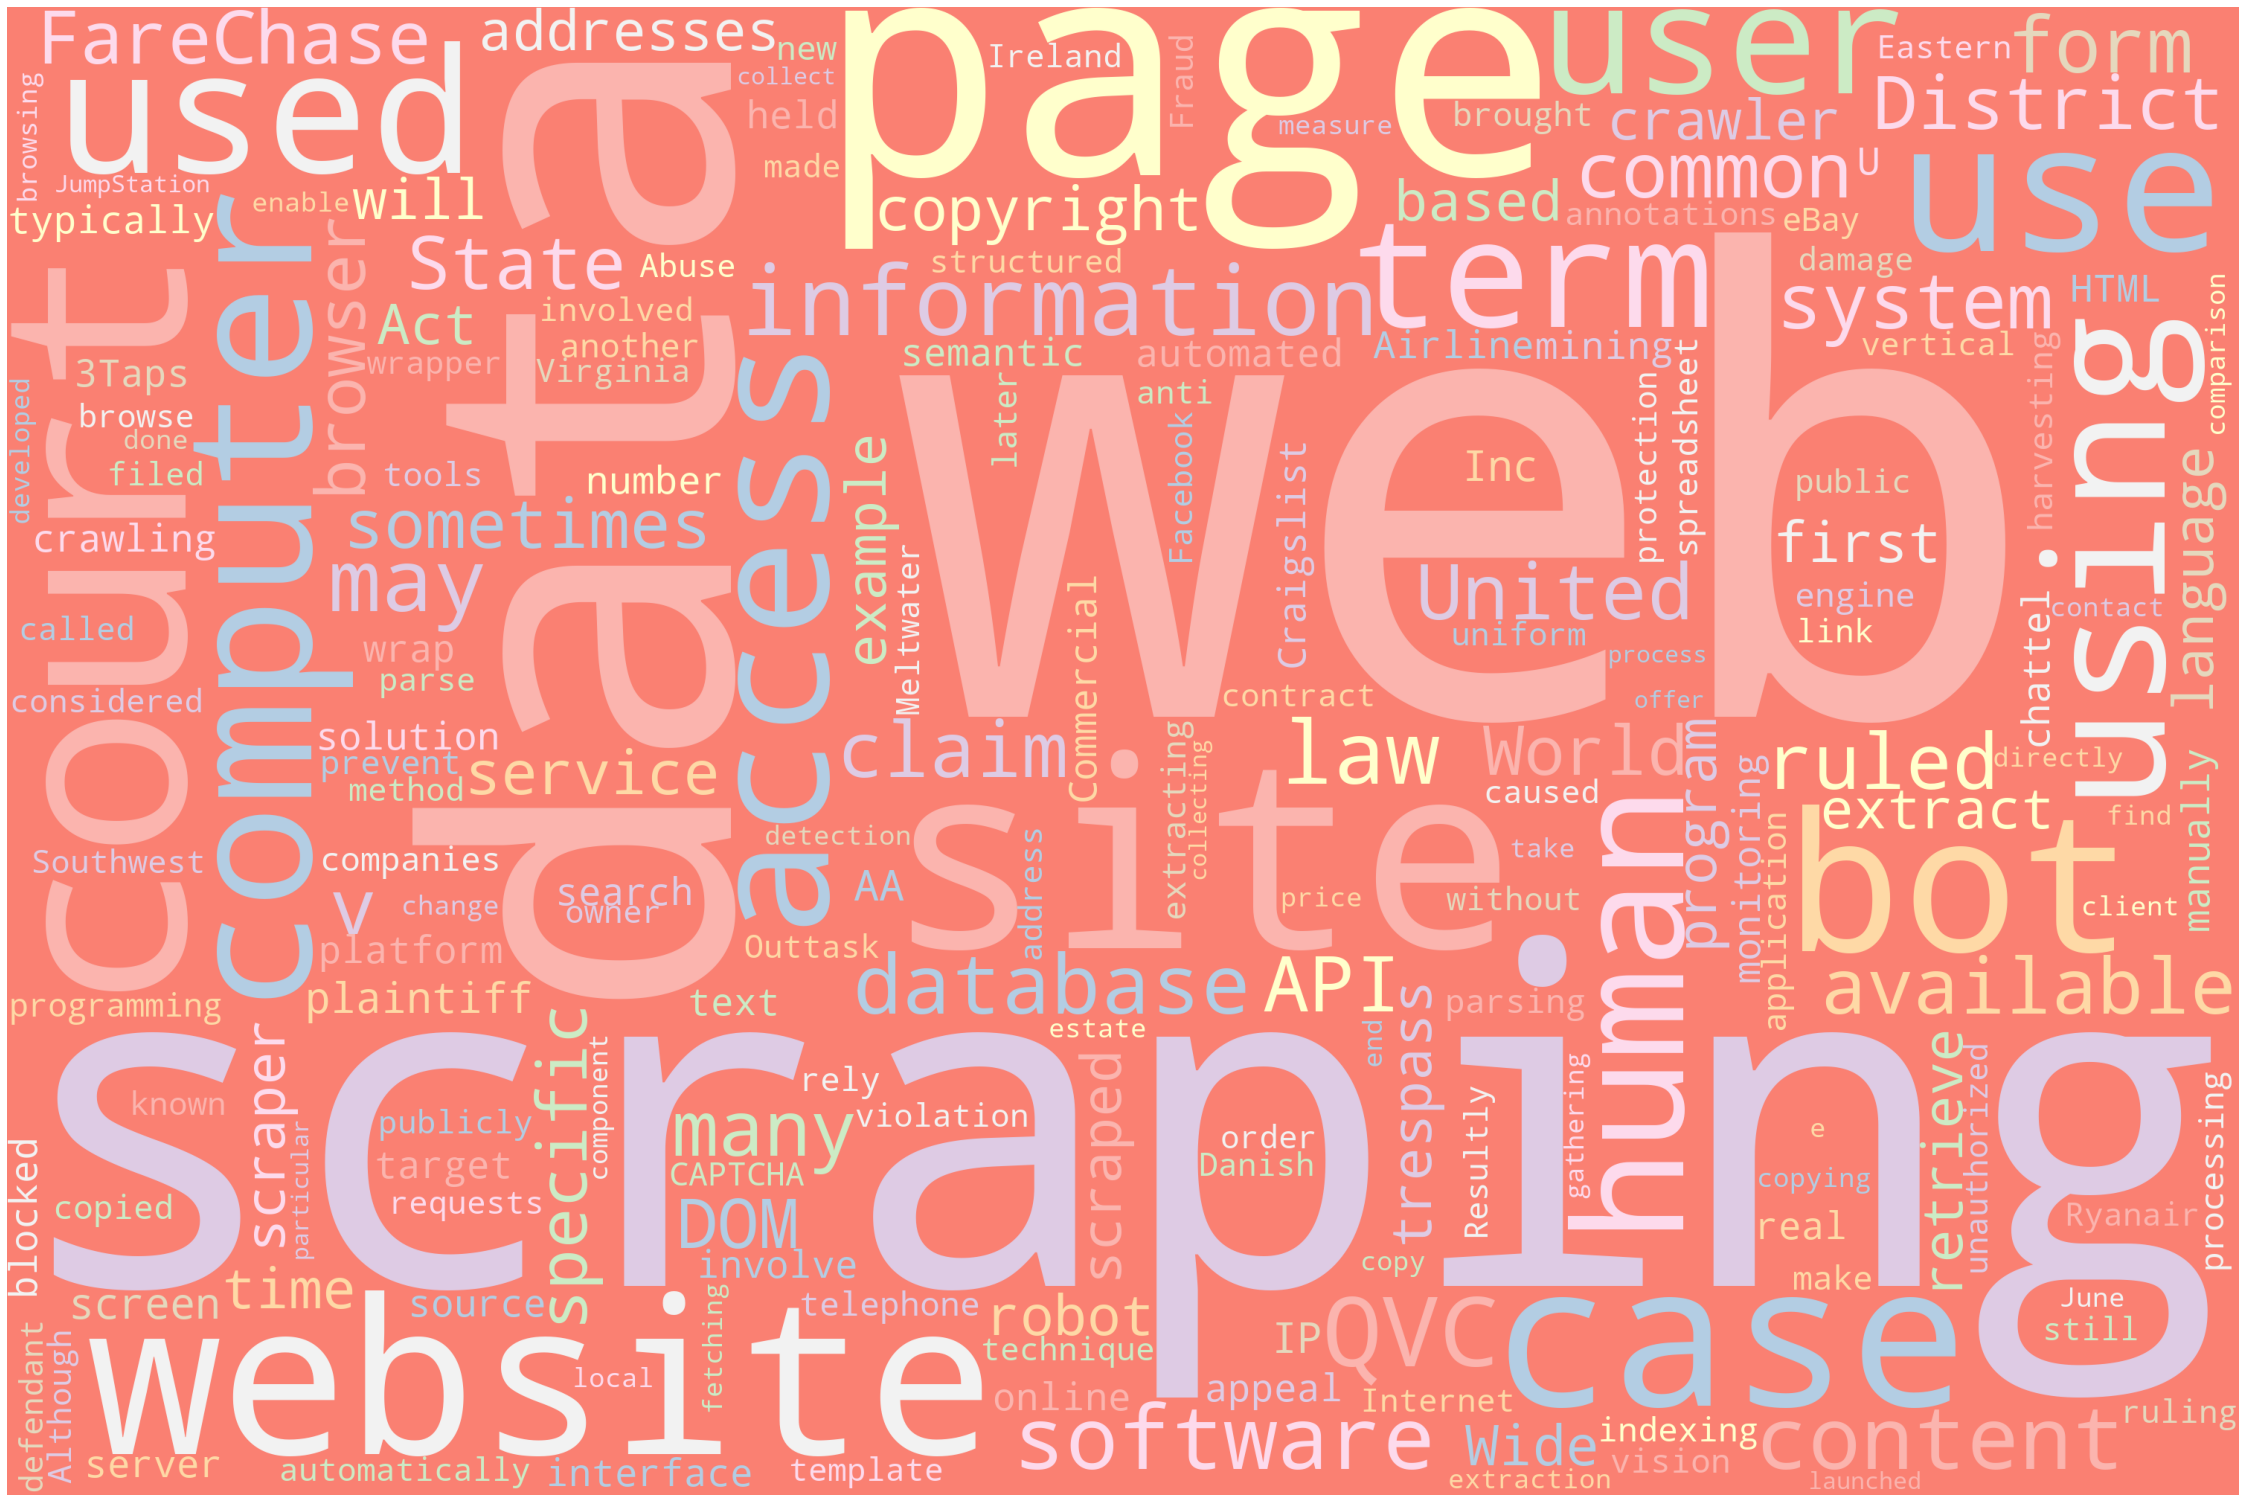

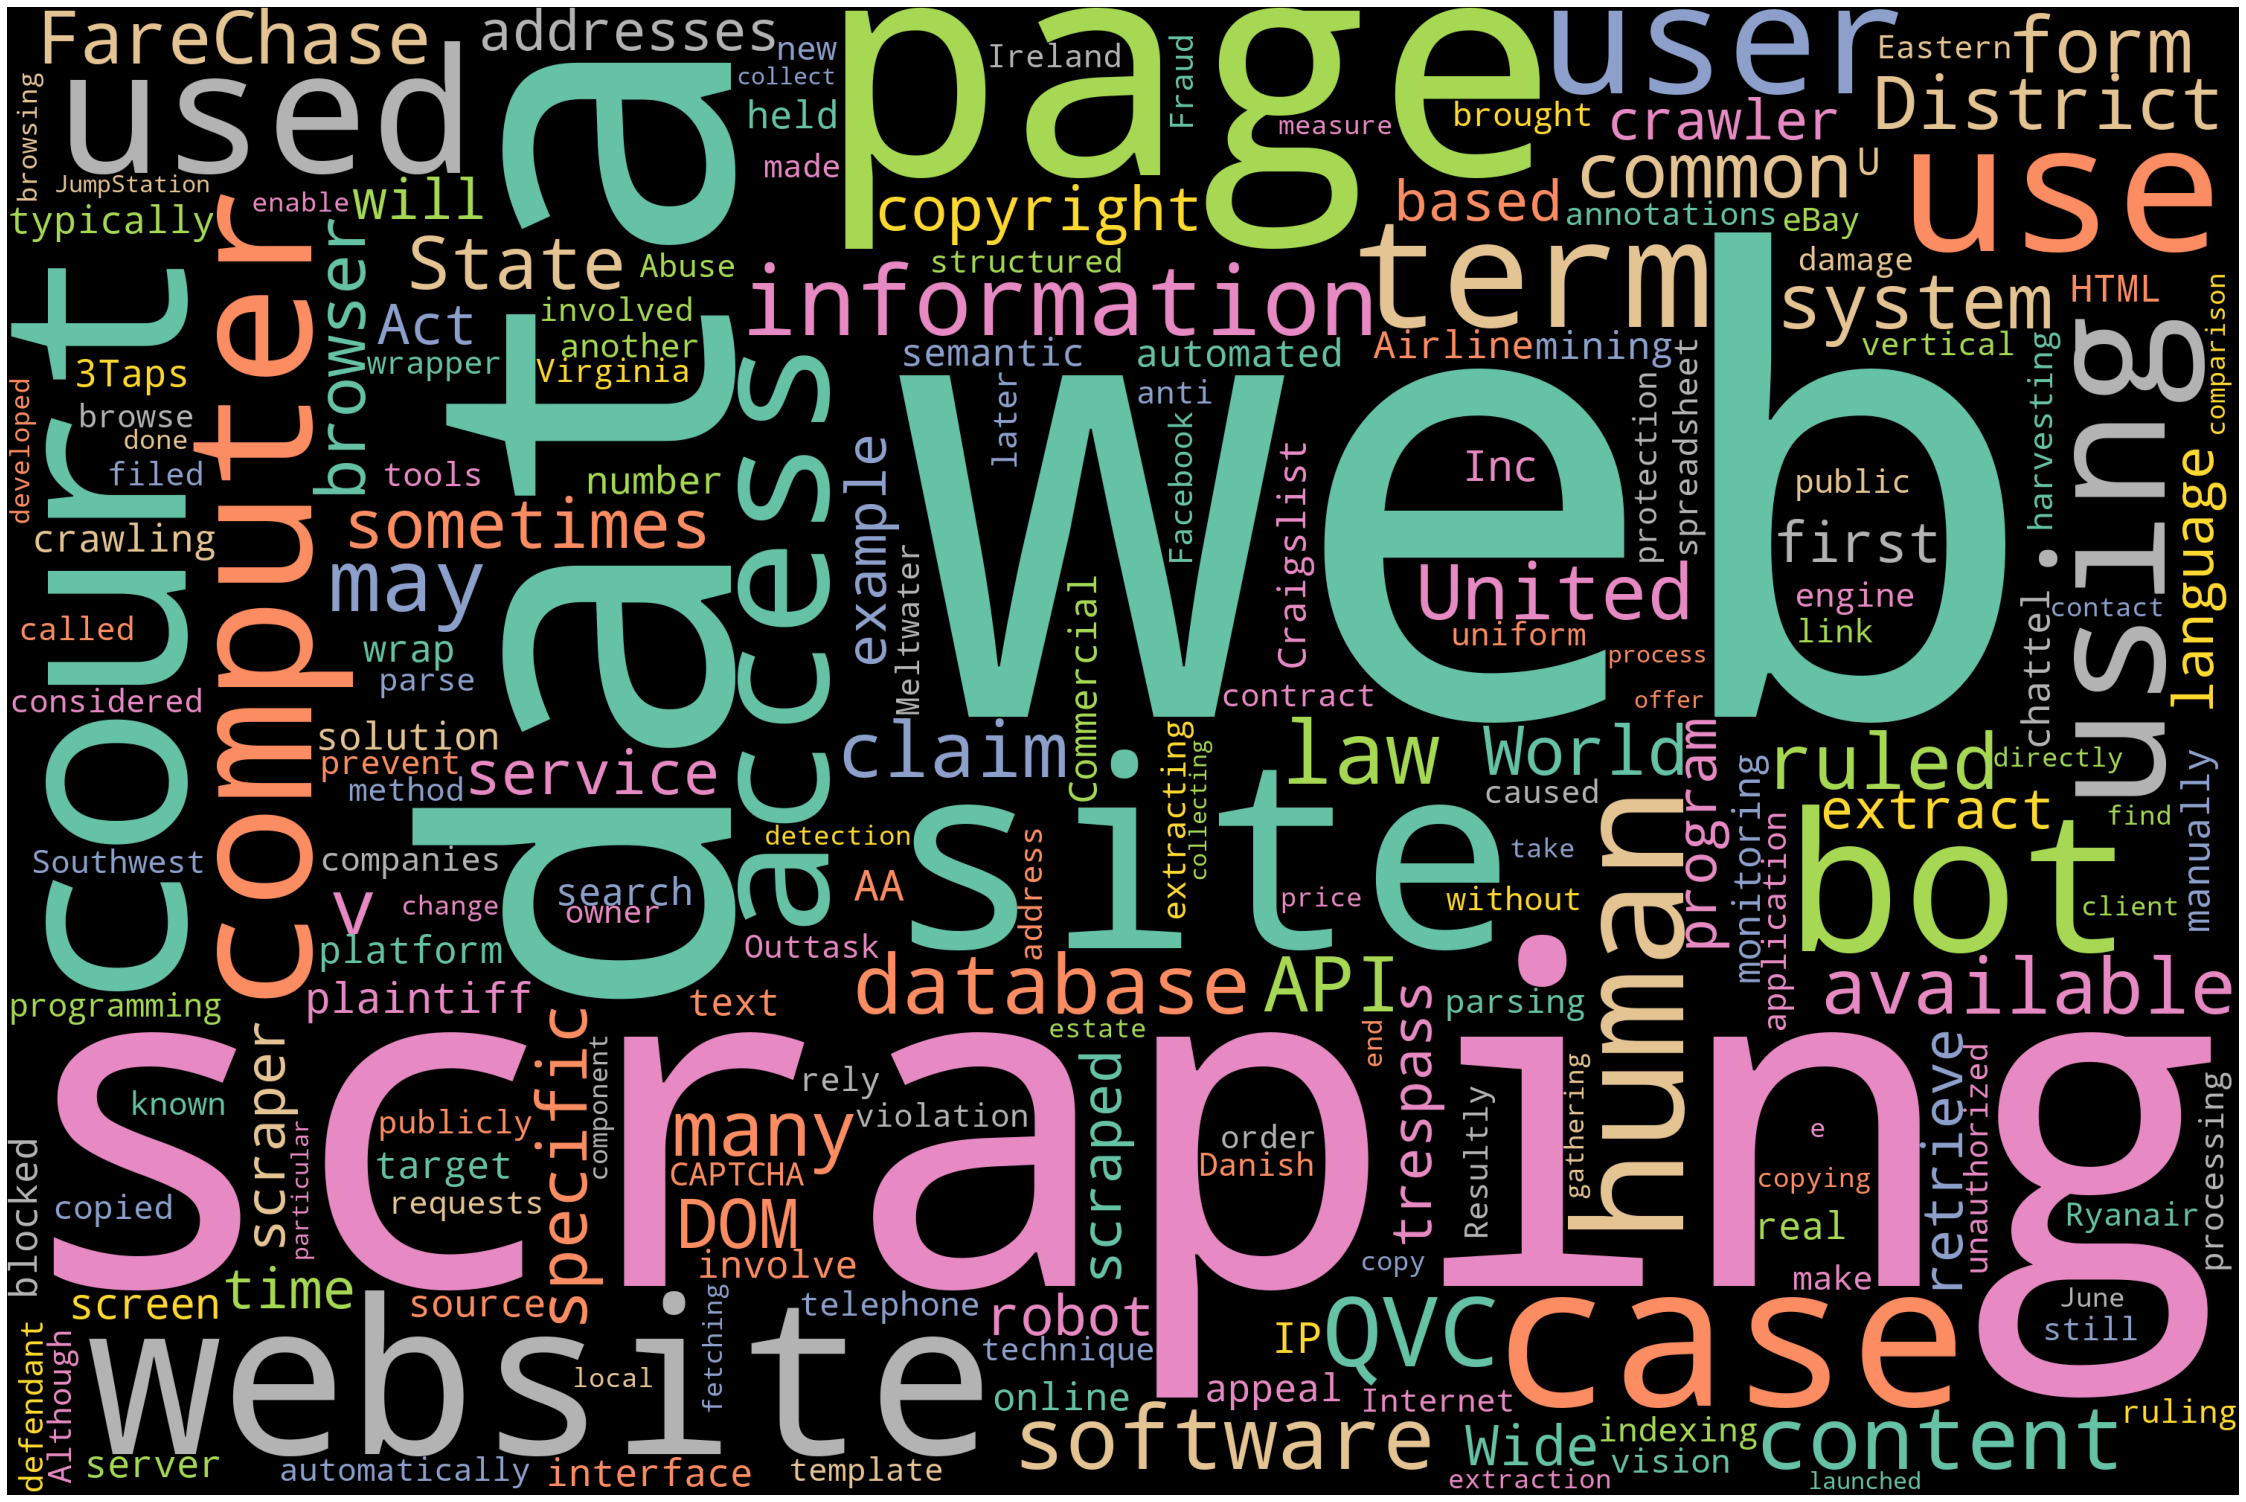

In [5]:
# 2.	Complete the following additional tutorial Word Cloud


#   1. Data 📦
# Import packages
import wikipedia
import re

# Specify the title of the Wikipedia page
wiki = wikipedia.page('Web scraping')

# Extract the plain text content of the page
text = wiki.content

# Clean text
text = re.sub(r'==.*?==+', '', text)
text = text.replace('\n', '')


#   2. Word cloud ☁️
# Firstly, let’s prepare a function that plots our word cloud:
# Import package
import matplotlib.pyplot as plt

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")

# Secondly, let’s create our first word cloud and plot it:
# Import package
from wordcloud import WordCloud, STOPWORDS

# Generate word cloud
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)


#       Generate Another wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)

# Save it as a .png file
wordcloud.to_file("wordcloud.png")






'''
◼️ width/height: You can change the word cloud dimension to your preferred width and height with these.

◼️ random_state: If you don’t this set this to a number of your choice, 
you are likely to get a slightly different word cloud every time you run the same script on the same input data. 
By setting this parameter, you ensure reproducibility of the exact same word cloud. 
You could play around with random numbers until you find the one that results in the word cloud you like.

◼️ background_colour: ‘white’ and ‘black’ are common background colours. If you would like to explore more colours, 
this may come in handy. Please note that some colours may not work. Hope you will find something you fancy.

◼️ colormap: With this argument, you can set up the colour theme that the words are displayed in. 
There are many beautiful Matplotlib colormaps to choose from. Some of my favourites are ‘rainbow’, ‘seismic’, ‘Pastel1’ and Pastel2’.

◼️ collocations: Set this to False to ensure that the word cloud doesn’t appear as if it contains any duplicate words. 
Otherwise, you may see ‘web’, ‘scraping’ and ‘web scraping’ as a collocation in the word cloud, giving an impression that words have been duplicated.

◼️ stopwords: Stopwords are common words which provide little to no value to the meaning of the text. 
‘We’, ‘are’ and ‘the’ are examples of stopwords. I have explained stopwords in more detail here (scroll to ‘STEP3. REMOVE STOPWORDS’ section). 
Here, we used STOPWORDS from the wordcloud package. 
To see the set of stopwords, use print(STOPWORDS) and to add custom stopwords to this set, use this template STOPWORDS.update(['word1', 'word2']), 
replacing word1 and word2 with your custom stopwords before generating a word cloud.
'''






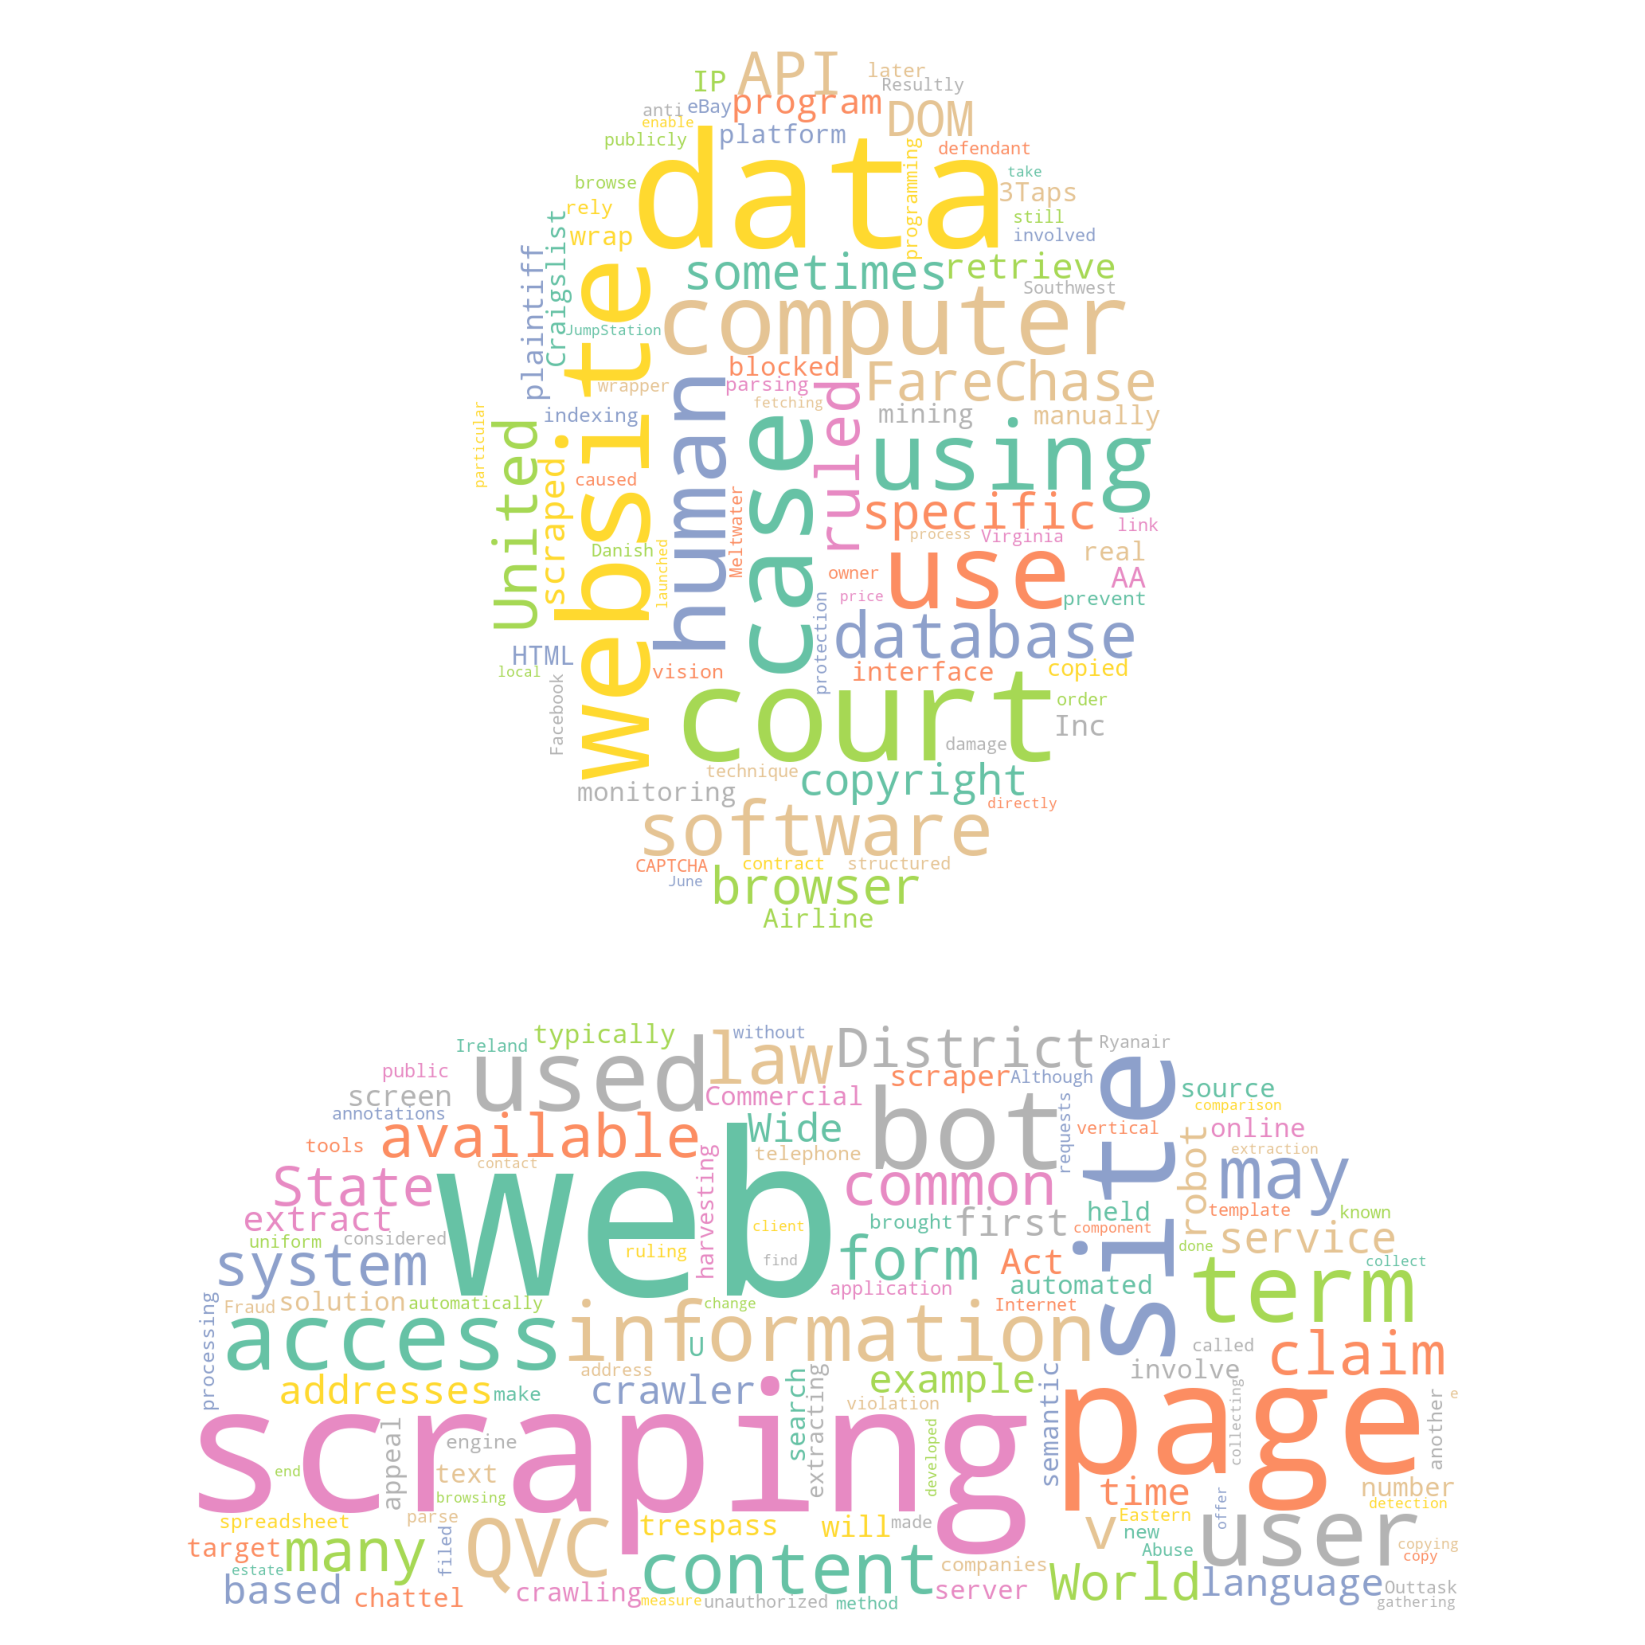

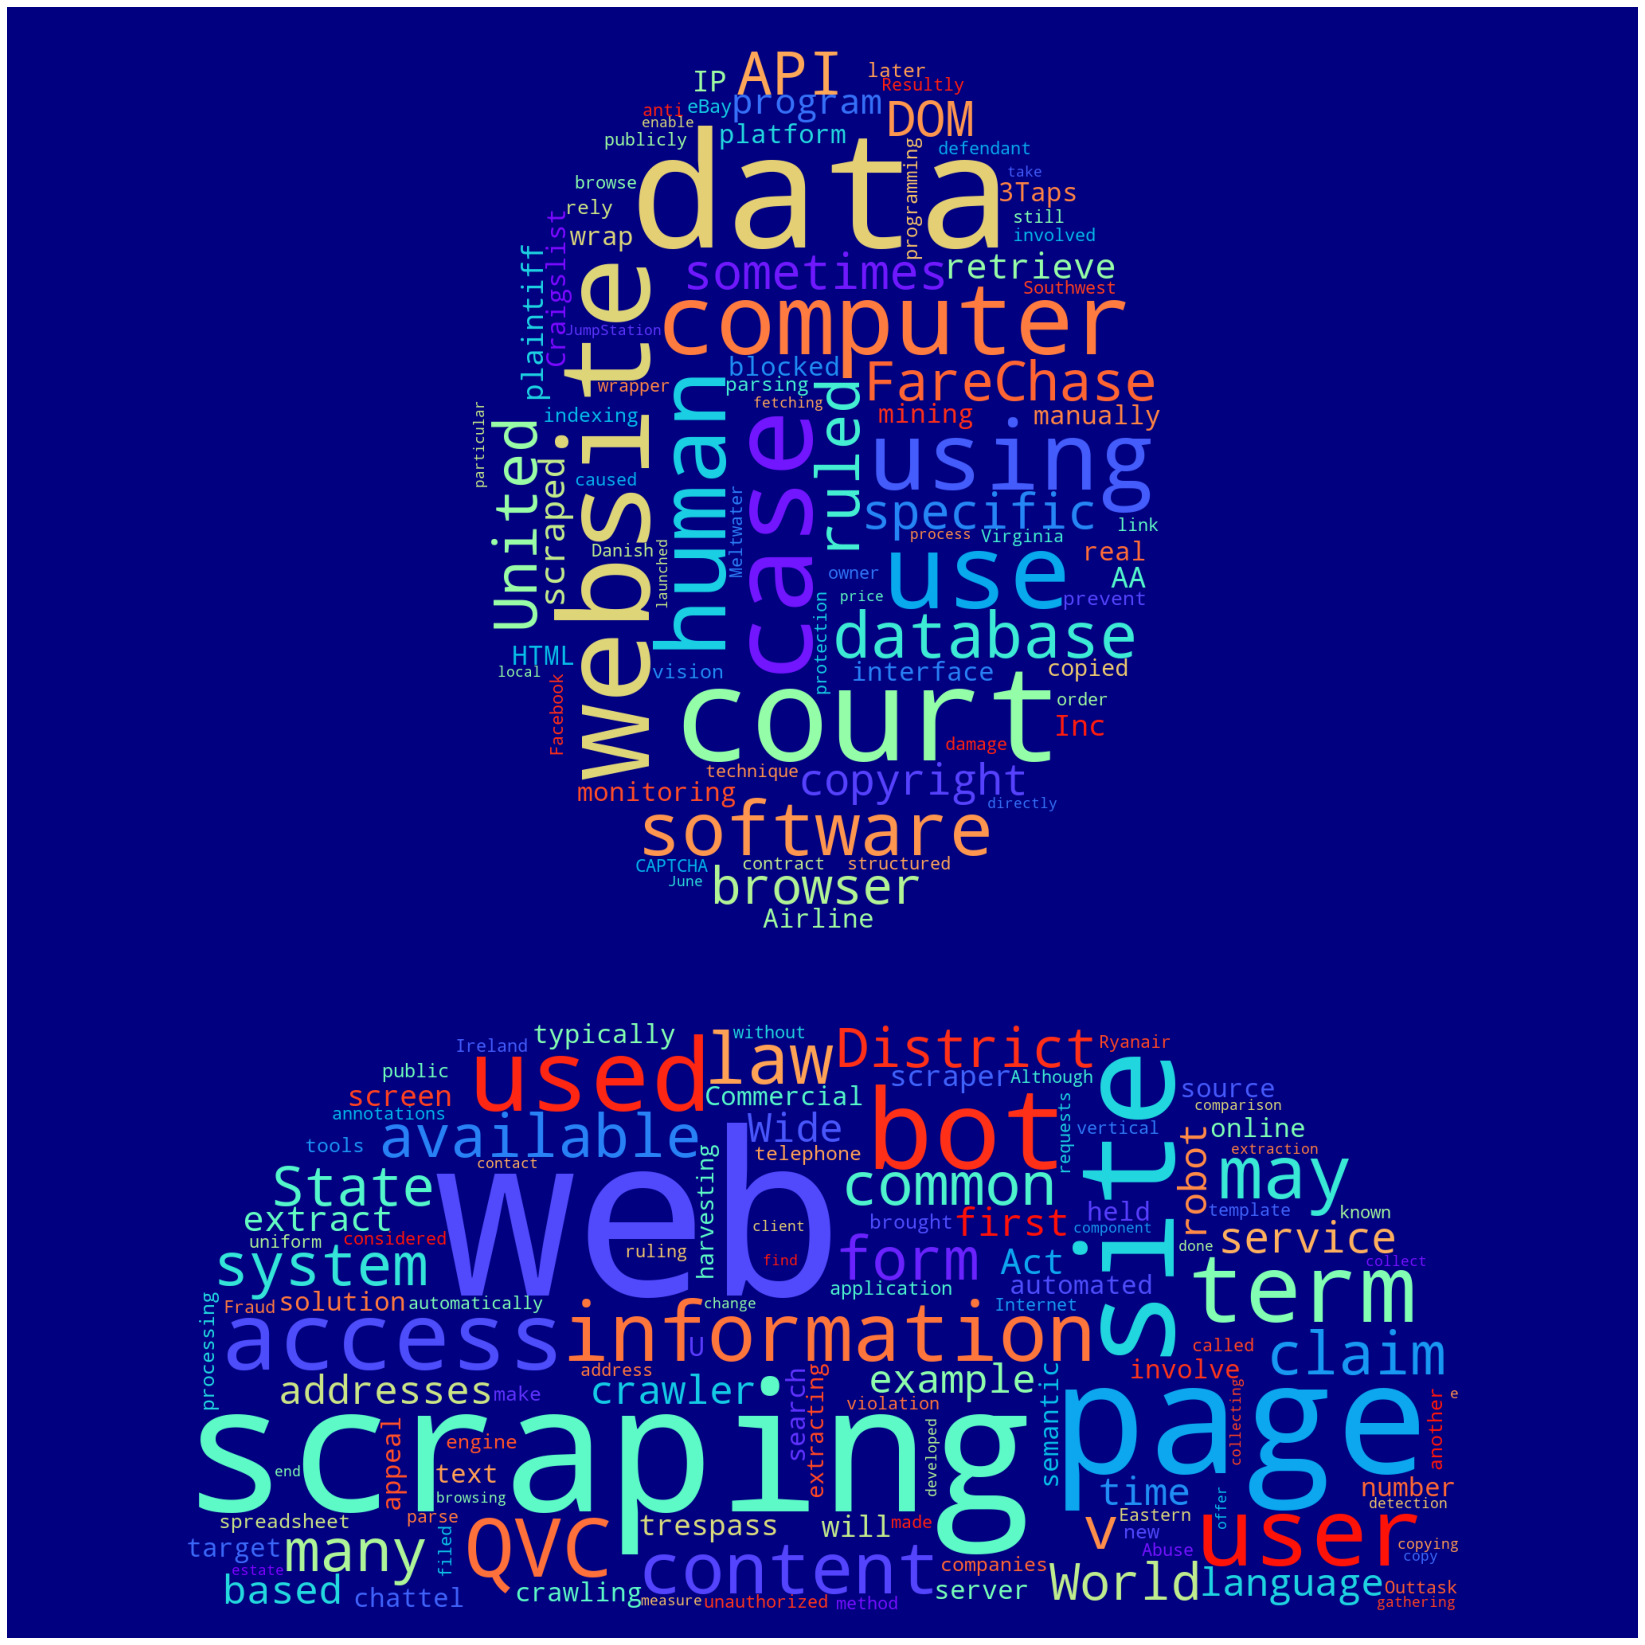

In [6]:
# 3. Fancier word cloud 🌸
# Import packages
import numpy as np
from PIL import Image

# Import image to np.array
mask = np.array(Image.open('user.png'))

# Generate wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS, mask=mask).generate(text)
# Plot
plot_cloud(wordcloud)

# Generate wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='navy', colormap='rainbow', collocations=False, stopwords = STOPWORDS, mask=mask).generate(text)
# Plot
plot_cloud(wordcloud)

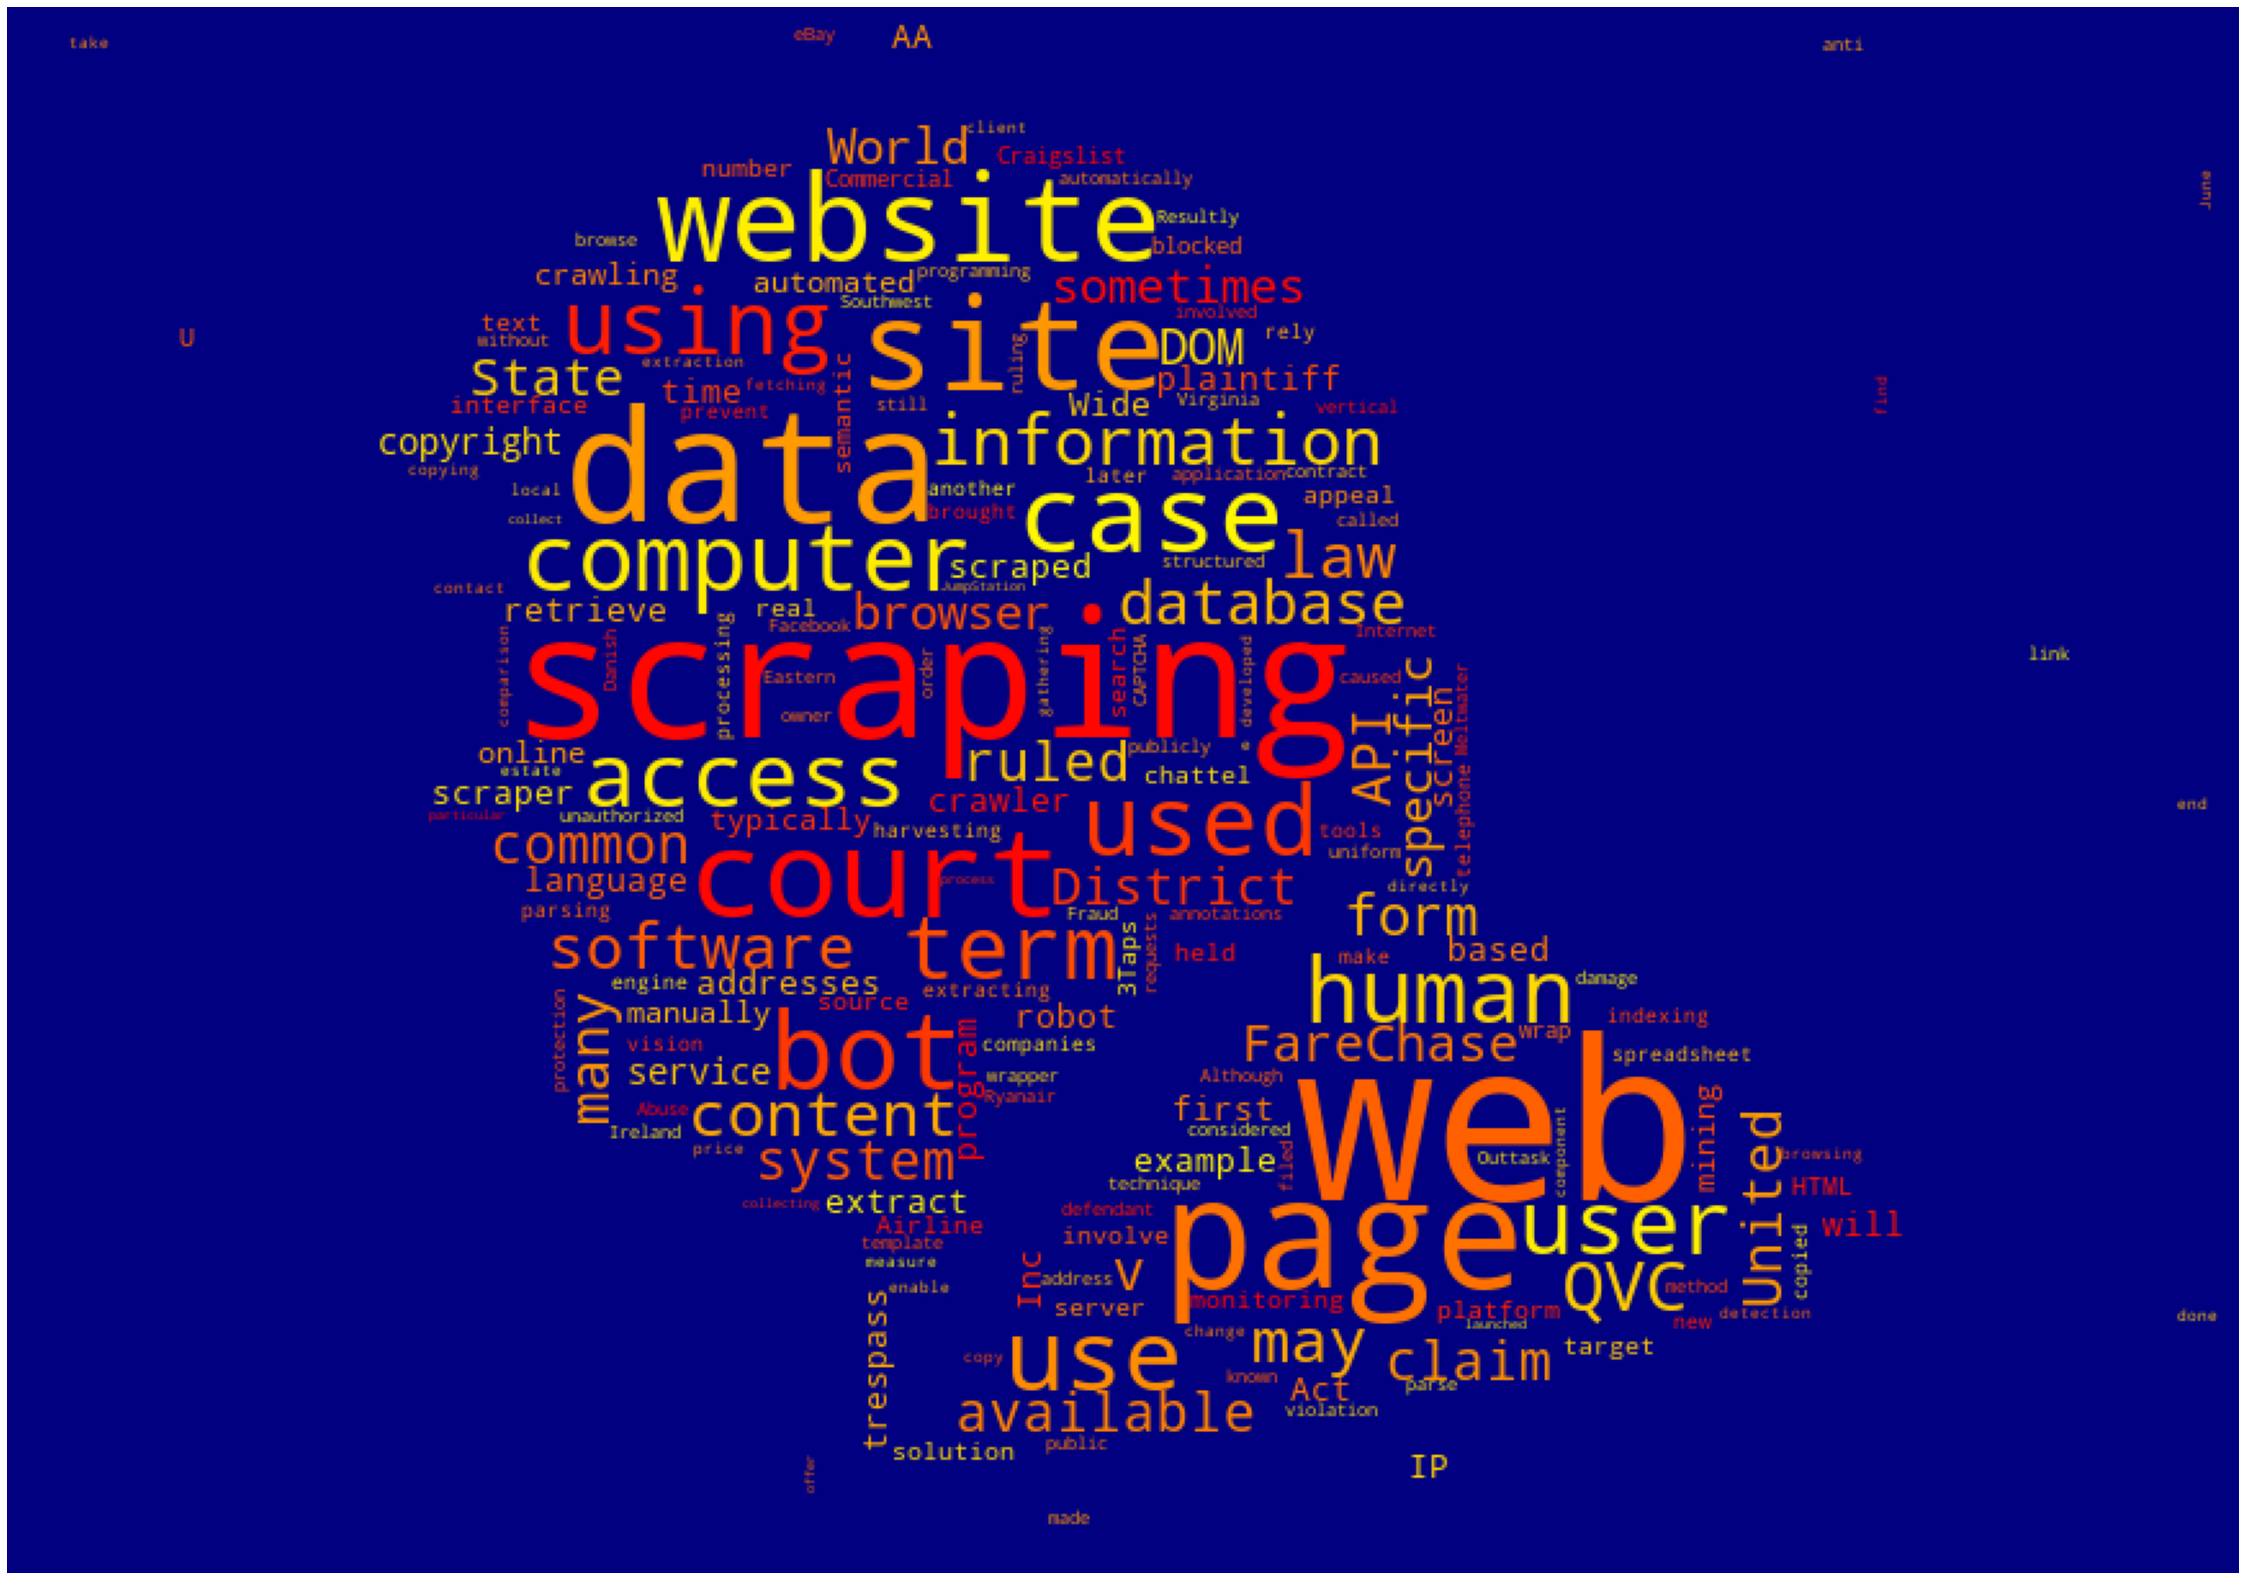

In [7]:
#       Trump Word Cloud 

# Import packages
import numpy as np
from PIL import Image


# Import image to np.array
mask = np.array(Image.open('trump.png'))

# Generate wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='Navy', colormap='autumn', collocations=False, stopwords = STOPWORDS, mask=mask).generate(text)
# Plot
plot_cloud(wordcloud)

